In [1]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# IMPORTING DATASET
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# CHECKING FOR NULL VALUES
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
# CHECKING FOR DUPLICATE VALUES
data[data.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


# ANALYSIS

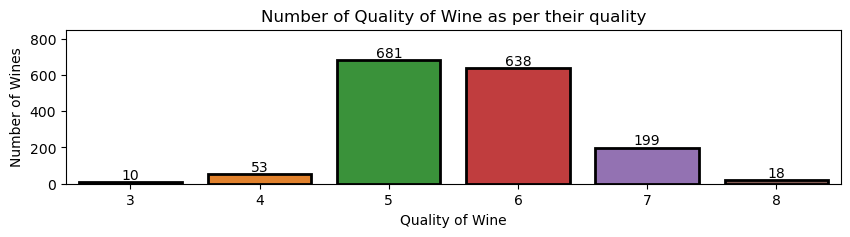

In [5]:
# GRAPHICAL REPRESENTATION OF DATA
fig,ax = plt.subplots(figsize=(10,2))
Plot = sns.countplot(data=data,x='quality',ax=ax,ec='k',lw=2)
ax.bar_label(ax.containers[0])
plt.ylim(0,850)
plt.xlabel('Quality of Wine')
plt.ylabel('Number of Wines')
plt.title('Number of Quality of Wine as per their quality')
plt.show()

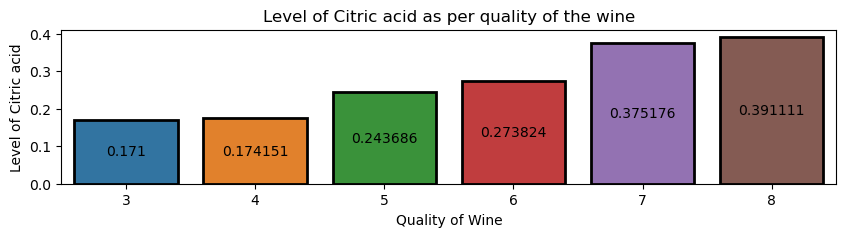

In [6]:
# GRAPHICAL REPRESENTATION OF DATA
fig,ax = plt.subplots(figsize=(10,2))
Plot = sns.barplot(data.groupby('quality')['citric acid'].mean().keys(),data.groupby('quality')['citric acid'].mean(),ax=ax,ec='k',lw=2)
ax.bar_label(ax.containers[0],label_type='center')
# plt.ylim(0,850)
plt.xlabel('Quality of Wine')
plt.ylabel('Level of Citric acid')
plt.title('Level of Citric acid as per quality of the wine')
plt.show()

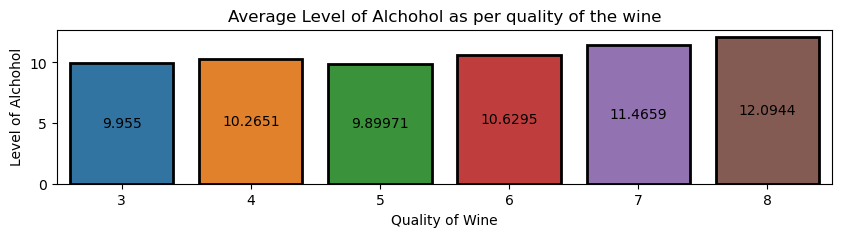

In [7]:
# GRAPHICAL REPRESENTATION OF DATA
fig,ax = plt.subplots(figsize=(10,2))
Plot = sns.barplot(data.groupby('quality')['alcohol'].mean().keys(),data.groupby('quality')['alcohol'].mean(),ax=ax,ec='k',lw=2)
ax.bar_label(ax.containers[0],label_type='center')
# plt.ylim(0,850)
plt.xlabel('Quality of Wine')
plt.ylabel('Level of Alchohol')
plt.title('Average Level of Alchohol as per quality of the wine')
plt.show()

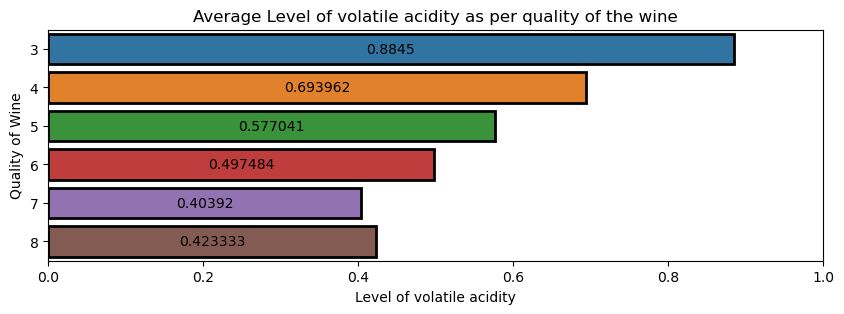

In [8]:
# GRAPHICAL REPRESENTATION OF DATA
fig,ax = plt.subplots(figsize=(10,3))
Plot = sns.barplot(data.groupby('quality')['volatile acidity'].mean(),data.groupby('quality')['volatile acidity'].mean().keys(),ax=ax,ec='k',lw=2,orient='h')
ax.bar_label(ax.containers[0],label_type='center')
plt.xlim(0,1)
plt.ylabel('Quality of Wine')
plt.xlabel('Level of volatile acidity')
plt.title('Average Level of volatile acidity as per quality of the wine')
plt.show()

In [9]:
data.shape

(1599, 12)

In [10]:
# DROPING DUPLICATE DATA
data.drop_duplicates(inplace=True)

In [11]:
data[data.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [12]:
data.shape

(1359, 12)

In [13]:
# NUMBER OF EACH TYPE OF QUALITY WINE 
data.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [14]:
# CHANGING 3,4,5,6 AS BAD QUALITY AND 7,8 TO GOOD QUALITY WINE FOR MODEL TO BETTER UNDERSTAND THE DATA
data['quality'] = data['quality'].replace(to_replace=[[3,4,5,6],[7,8]],value=['Bad Quality Wine','Good Quality Wine'])
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad Quality Wine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad Quality Wine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad Quality Wine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Bad Quality Wine
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Bad Quality Wine


In [15]:
data.quality.value_counts()

Bad Quality Wine     1175
Good Quality Wine     184
Name: quality, dtype: int64

In [16]:
# ASSINGING DATA TO X AND Y VARIABLES
X = data.drop(columns='quality')
Y = data['quality']

In [17]:
# STANDARDIZATION
SC = StandardScaler()
X = SC.fit_transform(X)

In [18]:
# TRAIN AND TEST SPLIT
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=1,test_size=.3)

In [19]:
# ML MODEL FUNCTION
LR = LogisticRegression()
DT = DecisionTreeClassifier()
NB = GaussianNB()
RF = RandomForestClassifier()
SVM = SVC()
ML_ALGO = [LR,DT,NB,RF,SVM]
def ML_Model(x_train,x_test,y_train,y_test):
    for i in ML_ALGO:
        i.fit(x_train,y_train)
        y_pred_train = i.predict(x_train)
        print(i,'model accuracy score on training data is',round(accuracy_score(y_pred_train,y_train)*100,2),'%')
        y_pred_test = i.predict(x_test)
        print(i,'model accuracy score on test data is',round(accuracy_score(y_pred_test,y_test)*100,2),'%')
        print('_'*30)

In [20]:
# FITTING DATA TO ML MODEL FUNCTION AND PREDICTING THE RESULT
ML_Model(x_train,x_test,y_train,y_test)

LogisticRegression() model accuracy score on training data is 88.33 %
LogisticRegression() model accuracy score on test data is 87.01 %
______________________________
DecisionTreeClassifier() model accuracy score on training data is 100.0 %
DecisionTreeClassifier() model accuracy score on test data is 86.27 %
______________________________
GaussianNB() model accuracy score on training data is 83.49 %
GaussianNB() model accuracy score on test data is 82.35 %
______________________________
RandomForestClassifier() model accuracy score on training data is 100.0 %
RandomForestClassifier() model accuracy score on test data is 89.71 %
______________________________
SVC() model accuracy score on training data is 89.7 %
SVC() model accuracy score on test data is 89.22 %
______________________________


--Logistic Regression and Support Vector Machine provides good accuracy score on Train and Test Data--